In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from hot_sauce.config import Peppers
from hot_sauce.hot_sauce import (
    HotSauceData,
    sample_peppers,
    compute_color,
    enum_to_data_frame,
    compute_peppers_factor)

In [3]:
hsd = HotSauceData().sample(2000)

In [4]:
def hist_set_colormap(bins, patches, colormap):
    # Source: https://stackoverflow.com/questions/23061657
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', colormap(c))

Text(0.5,1,'Hot Sauce Color')

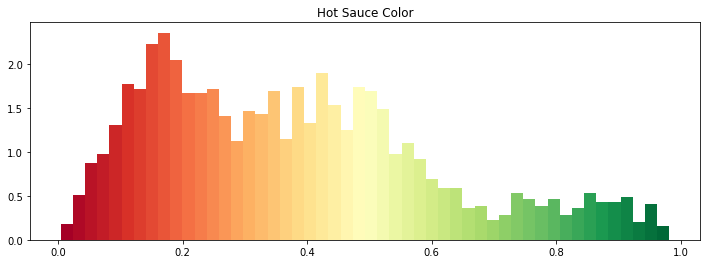

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))

n, bins, patches = ax.hist(hsd.COLOR, bins=50, density=True, color='green')
hist_set_colormap(bins, patches, cm.RdYlGn)
ax.set_title("Hot Sauce Color")

Text(0,0.5,'Spicyness')

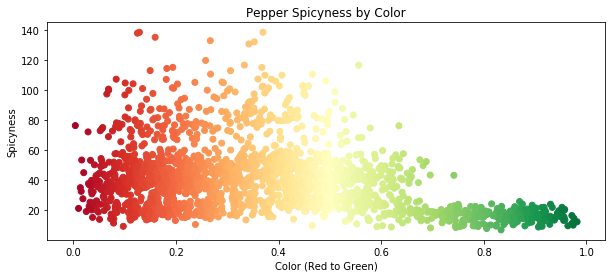

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(hsd.COLOR, hsd.SPICYNESS, color=cm.RdYlGn(hsd.COLOR))
ax.set_title("Pepper Spicyness by Color")
ax.set_xlabel("Color (Red to Green)")
ax.set_ylabel("Spicyness")

Text(0,0.5,'Spicyness')

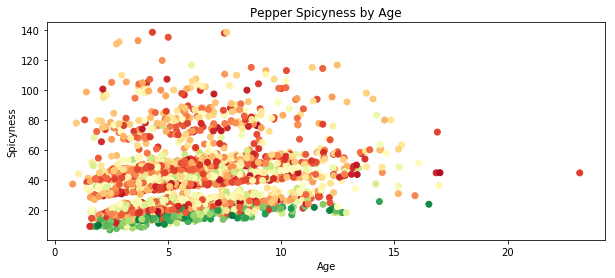

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(hsd.AGE, hsd.SPICYNESS, color=cm.RdYlGn(hsd.COLOR))
ax.set_title("Pepper Spicyness by Age")
ax.set_xlabel("Age")
ax.set_ylabel("Spicyness")

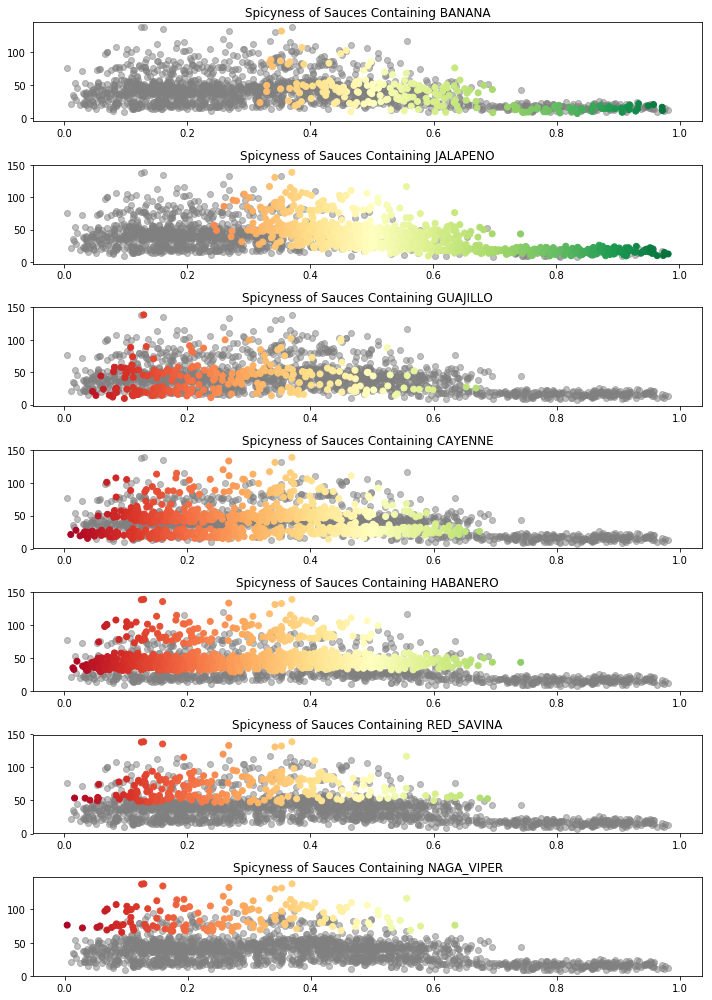

In [8]:
fig, axs = plt.subplots(len(Peppers), 1, figsize=(10, 14))

for p, ax in zip(Peppers, axs):
    name = p.name
    df_p_in_sauce = hsd[hsd[name]]
    df_p_not_in_sauce = hsd[~hsd[name]]
    ax.scatter(
        df_p_not_in_sauce.COLOR, df_p_not_in_sauce.SPICYNESS, 
        color="grey", alpha=0.5)
    ax.scatter(
        df_p_in_sauce.COLOR, df_p_in_sauce.SPICYNESS, 
        color=cm.RdYlGn(df_p_in_sauce.COLOR))
    ax.set_title(f"Spicyness of Sauces Containing {name}")

fig.tight_layout()